# Практическая работа №7: Кластерный анализ. Метод поиска сгущений

Выполнил студент гр. 9372 Чернышев Андрей.

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода поиска сгущений.

## Основные теоретические положения
Формулы для нахождения оценки разбиения:
 * $$ F = \frac{1}{n} \sum_{i = 1}^{k} (\# c_{j}) F_j$$
 * $$ F_j = \sum_{i=1}^{\#c_i}d(x; x_{c_j})$$

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №4). Выполнить разбиение исходного множества объектов на конечное число подмножеств(кластеров) с использованием метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Нормализовать множество точек, отобразить полученное множество.
2. Реализовать алгоритм поиска сгущений, отобразить полученные
кластеры, выделить каждый кластер разным цветом, отметить центроиды.
3. Проверить чувствительность метода к погрешностям. Сделать выводы.
4. Сравнить с методами из практической работы №6. Сделать выводы.

## Выполнение работы



In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

Задание 1

нормализация: 


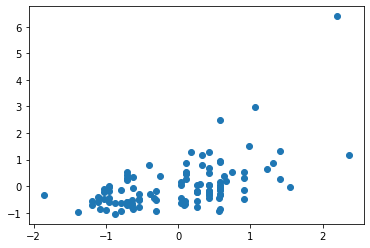

In [34]:
table = pd.read_csv("laptop_price.csv",delimiter=',')
x_sko = 0.62
y_sko = 204.565
x_mid = 1.839
y_mid = 387.198
x_norm = (table['Weight'] - x_mid)/ x_sko
y_norm = (table['Price_euros'] - y_mid)/ y_sko
print ('нормализация: ')
table_norm = pd.DataFrame({'x': x_norm, 'y': y_norm})
table_norm_medians = table_norm.copy()
plt.scatter(table_norm['x'], table_norm['y'])
plt.show()

Задние 2

R_min = 0.005
R_max = 8.174
Возьмем произвольное R_min < R < R_max: Пусть R = 0.5 


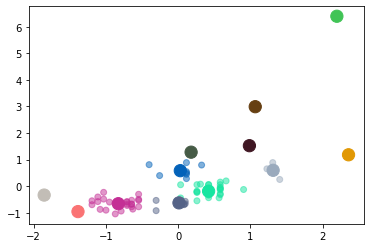

На рисунке видно, что сгущения находятся от центра кластеров на расстояниях <= R, значит построено верно 


In [35]:
import random


def forel(points, radius, limit = 1e-1):
    centroids = pd.DataFrame()
    j = 0
    centroids_data = pd.DataFrame()
    while len(points) != 0:
        current_point = get_random_point(points)
        neighbors = get_neighbors(current_point, radius, points)
        centroid = get_centroid(neighbors)
        while np.linalg.norm(current_point - centroid) > limit:
            current_point = centroid
            neighbors = get_neighbors(current_point, radius, points)
            centroid = get_centroid(neighbors)
        points = remove_points(neighbors, points)
        for i in range(len(neighbors)):
                centroids_data = centroids_data.append({'x':neighbors[i][0], 'y':neighbors[i][1], 'centroid': j},ignore_index="True")
        j += 1
        centroids = centroids.append({'x': current_point[0], 'y':current_point[1]}, ignore_index="True")
        centroids_data['centroid'] = centroids_data['centroid'].astype('int')
    return centroids, centroids_data


def get_neighbors(p, radius, points):
    neighbors = [point for point in points if np.linalg.norm(p - point) < radius]
    return np.array(neighbors)

def get_length(a, b):
    return np.linalg.norm(a - b)

def get_centroid(points):
    return np.array([np.mean(points[:, 0]), np.mean(points[:, 1])])


def get_random_point(points):
    random_index = np.random.choice(len(points), 1)[0]
    return points[random_index]


def remove_points(subset, points):
    points = [p for p in points if p not in subset]
    return points

table_norm_arr = np.array(table_norm)
r = []
for i in range(len(table_norm_arr)):
    for j in range(len(table_norm_arr)):
        r_candidate = get_length(table_norm_arr[i], table_norm_arr[j])
        if r_candidate != 0:
            r.append(round(r_candidate, 3))
r_real = np.unique(r)
r_min = r_real.min()
r_max = r_real.max()
print(f'R_min = {r_min}')
print(f'R_max = {r_max}')
rad = 0.5
print(f'Возьмем произвольное R_min < R < R_max: Пусть R = 0.5 ')
centroids, centroids_data =  forel(table_norm_arr, 0.5)
colors = []
for i in range(20):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
colors_dict = dict(zip(list(range(0, len(colors))), colors))
plt.scatter(centroids_data.iloc[:,0], centroids_data.iloc[:,1],  marker = 'o', c = centroids_data['centroid'].apply(lambda x: colors_dict[x]),  alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s = 150, c = centroids.index.map(lambda x: colors_dict[x]) )
plt.show()
print('На рисунке видно, что сгущения находятся от центра кластеров на расстояниях <= R, значит построено верно ')

Задание 3

In [36]:
df = np.where(centroids_data['centroid'] == 0)
print(df)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),)


## Выводы
В результате выполнения практической работы был реализован алгоритм FOREL и дана его оценка.
Существенное отличие от алгоритмов из 6 работы заключается в том, что радиус сферы дается уже на вход алгоритма и
он уже сам выбирает оптимальное количество кластеров.


